# Python for Machine Learning

1. Content
2. Review of ML
    - Supervised learning
    - Unsuperivised learning
3. Python Environment for ML
    - Libraries and modules for ML
4. ML in scikit-learn
    - Introduction to sklearn
    - Basic ML: linear regression, logistic regression, k-means
    - Moderate ML: classification trees, neural networks
5. Learning more 

# Review of ML

*What is ML?*

- Making sense of data
- Performing induction on data

In ML we are given **data**, and we want to learn **something** from the data.

ML answers the question **how** to learn; the question **what** to learn is up to YOU.

## Types of ML

*What types of ML are there?*

We can formalize different learning tasks

- Supervised learning
- Unsupervised learning
- Reinforcement learning
- Semi-supervised learning
- Transfer learning
- ...

Problems vary according to the the type of **data** you are given and the type of **knowledge** you want to get.

## Supervised learning

In *supervised learning* we are given a set of **individuals** or *samples*. Each one has a set of numerical **attributes** and it comes with a **label** on interest.

We feed all this data to a **model** which is supposed to learn the **relationship** between attributes and labels.

<img src="SL_train1.png" width="1000"/>

This phase is called **training** or *fitting*.


Once we have trained a model, we can use it to **predict** the label of new individuals.

<img src="SL_use1.png" width="1000"/>

This phase is called **testing** or *deployment*.


## Unsupervised learning

In *unsuperivised learning* we do not have *labels*. So what we try to do is to **group** individuals together in a meaningful way using their attributes.

<img src="UL.png" width="1000"/>

More in general, we try to **discover structure** in the data. 

## Problem of generalization

It is important to understand that we want our model **not to memorize** the data, but to **generalize**.

We want the model to be able to predict/categorize/group new data that it has **never** seen before.

This is what we mean by **induction**.

This is supposed to work like humans: after seeing some examples of horse, you are able to recognize specific instances of horse, even if you had not seen this specific horses before.

## Fitting and testing

The machine learning workflow includes then two main distinct phases:

1. **Training**: you use a set of data (**training data**) to fit/configure your model
2. **Testing**: you use a set of data (**test data**) to evaluate the level of generalization of your model.

Since *generalization* must be assessed on unseen case, it is **VERY IMPORTANT** that the *test data* is **NEVER** used during training.

# Python Environment for ML

Python provides a flexible and customizable environment to set up your machine learning setup.

![](python_env.png)

Use **environment manager** systems to control you environment (e.g.: **conda**)
- Install packages for you
- Verify consistency between packages
- Allow rollback

## What we consider

<img src="python_env.png">

- **numpy**: library supporting matrices and tensors
- **matplotlib**: library for plotting
- **scikit-learn**: library for machine learning

## What we do not consider

![](python_env.png)

- **scipy**: library providing scientific modules for dealing with signal processing, statistics, engineering...
- **joblib**: library for pipelining
- **pandas**: library for managing and querying data frames
- **networkx**: library for working with graphs
- **tensorflow** and **pytorch**: library for running neural networks
- **jupyter**: interactive interface to the python environment (what we are running now)

# ML in scikit-learn

*scikit-learn* is a popular python package providing a wide selection of algorithms.

We are going to see how to carry out machine learning tasks relying on *scikit-learn*.

*scikit-learn* contains many more functionalities than the few ones we are going to consider here. Refer to the [documentation](https://scikit-learn.org/stable/) to learn more!

## ML pipeline

A simplified ML pipeline contains at least the following steps:

![](ML_pipeline.png)

- *Data loading*: we start by gathering the data we want to analyze
- *Data partitioning*: we divide data for training/fitting and data for evaluation
- *Data pre-processing*: we fix and/or improve the data quality
- *Model fitting*: we apply a machine learning model
- *Evaluation*: we measure how well the model performs

If we are happy with the evaluation we can then deploy our model; otherwise, we go back.

## Data as matrices/tensors

Data is essentially represented as a *table*

  .   | Age | Pressure | Heartrate | ... | BMI 
------|------------|------------|------------|-----|------------
Hippocrates | 36 | 120 | 69 | ... | 20
Imhotep | 72 | 112 | 81 | ... | 21
Charaka | 51 | 85 | 87 | ... | 20
... | ... | .... | .... | ... | ...
Ibn-Sina | 18 | 131 | 62 | ... | 22


- each row is a **sample**, *observation*, *case*, or *individual*.
- each column is a **feature**, or *attribute*.
- we usually refer to this table as $X$

This interpretation of rows and columns is pretty standard, but **remember to always check**!

We use **numpy** to encode a data table in a **matrix**, or *2D array* or *2D tensor*.

In [1]:
import numpy as np

X = np.array([[36,120,69,20],
             [72,132,81,21],
             [51,85,87,20],
             [18,131,62,22]])

print(X)

[[ 36 120  69  20]
 [ 72 132  81  21]
 [ 51  85  87  20]
 [ 18 131  62  22]]


Notice we discarded the name of columns and row.

Working with all the numbers in a single matrix allows to make computation very efficient!

If available we can represent labels similarly, in an *array*.

We may have **categorical** labels for *classsification*

  .   | Disease
------|------------
Hippocrates | 0 
Imhotep | 1 
Charaka | 0 
... | ... 
Ibn-Sina | 0 

Or **continuous** labels for *regression*

  .   | Disease Progression
------|------------
Hippocrates | 0.2 
Imhotep | 0.3 
Charaka | 0 
... | ... 
Ibn-Sina | 0.11 

- each row refers to a **sample**.
- each column is a **label**, or *target*.
- we usually refer to this table as $y$

We use **numpy** to encode a labels in a **array**.

In [2]:
y = np.array([0,1,0,0])

print(y)

[0 1 0 0]


As before notice we discarded the name of columns and row.

Remember that $X$ and $y$ must be **kept aligned**! The sample on row $i$ in the matrix $X$ corresponds to the labels $i$ in $y$.

In [3]:
print(X[2,:])
print(y[2])

[51 85 87 20]
0


Notice that *numpy* (and *scikit-learn*) are pretty rigorous on the **shape** of the objects.

Let's look at the shape of $X$ and $y$.

In [4]:
print(X.shape)
print(y.shape)

(4, 4)
(4,)


$X$ has two dimensions (of size 10 and 4), while $y$ has a single dimension (of size 4).

Some algorithms may ask you to provide a two-dimensional $X$ and a two dimensional $y$. We can easily add a unitary dimension to $y$.

In [5]:
Y = np.expand_dims(y,axis=1)
print(Y)
print(Y.shape)

[[0]
 [1]
 [0]
 [0]]
(4, 1)


The content of $y$ is the same.

However, for *numpy* the shape (4,) is different from (4,1).

**Be careful about what shapes are requires.**

## Data loading/generation

ML starts with **data**. You can:
- Collect your own data (complex, costly)
- Load available data (easy with public dataset)
- Generate your own data (useful for testing ideas)
- Aggregate sources (complex)

A **data set** is a homogeneous collection of data.


*sklearn* comes with datasets included!

Datasets are made available in *sklearn.datasets* (see [doc](https://scikit-learn.org/stable/datasets/index.html))


In [6]:
import sklearn.datasets as datasets


### Diabetes

We load the *diabetes* datataset and separate the data matrix ($X$), the labels ($y$), and the feature names ($fnames$).

In [7]:
dataset = datasets.load_diabetes()

X_diabetes = dataset['data']
y_diabetes = dataset['target']
fnames_diabetes = dataset['feature_names']

Let's have a look at our data.

In [8]:
X_diabetes.shape

(442, 10)

In [9]:
fnames_diabetes

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [10]:
y_diabetes[0:10]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310.])

*diabetes* is a regression dataset: labels are numbers.

As discussed above, the underlying structure of the data matrix $X$ is a table/matrix/tensor.

In [11]:
X_diabetes[0:5,0:5]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187235,  0.00393485]])

### Exercise

1. What are the features of individual 10?
2. What is the age of individual 23? What do you think is the meaning of this value?
3. What is the highest value of diabetes?
4. Can you compute the average age of all the individuals? What do you think is the meaning of this result?
5. What are the values that the variable 'sex' may assume? How do you interpret them?

Let's have a look at a plot of diabetes as a function of bmi.

Text(0, 0.5, 'diabetes')

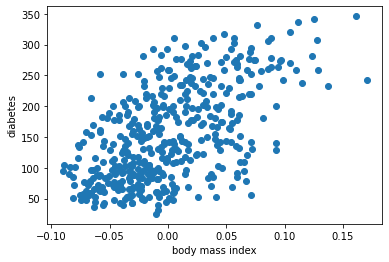

In [12]:
import matplotlib
import matplotlib.pyplot as plt

plt.scatter(X_diabetes[:,2],y_diabetes)
plt.xlabel('body mass index')
plt.ylabel('diabetes')

### Exercise

1. What are the observations you can already make from the plot we made?
2. Plot now diabetes as a function of age. What do you observe? What insights do you get from this?

### Iris

Let's have a look at the *iris* datataset as well, and separate the data matrix ($X$), the labels ($y$), and the feature names ($fnames$).

In [13]:
dataset = datasets.load_iris()

X_iris = dataset['data']
y_iris = dataset['target']
fnames_iris = dataset['feature_names']

In [14]:
X_iris.shape

(150, 4)

In [15]:
fnames_iris

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [16]:
y_iris[45:55]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

*iris* is a regression dataset: labels are categories.

As discussed above, the underlying structure of the data matrix $X$ is a table/matrix/tensor.

In [17]:
X_iris[0:5,0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

### Exercise

1. What are the features of sample 21?
2. How many labels do we have?
3. What is the maximum and minimum value of petal length?
4. Is there a different in how the values of petal length in *iris* are recorded compared to the values of age in *diabetes*?

Let's have a look at a how the labels depend on petal length and petal width.

Text(0, 0.5, 'petal width')

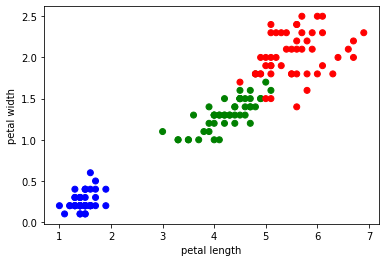

In [18]:
colors = ['blue', 'green', 'red']

plt.scatter(X_iris[:,2],X_iris[:,3],c=y_iris, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('petal length')
plt.ylabel('petal width')

### Exercise

1. What are the observations you can already make from the plot we made?
2. Plot now the same graph using different feature, for example, sepal length and petal width. What insights do you get from this?

## Data partitioning

As explained, it is important to divide the data between *training* and *test* data.

Sometimes, you are given data already partitioned. Sometimes, you have to partition it yourself.

We now divide both *diabetes* and *iris* data in two sets. 

Before dividing the data, we randomly shuffle it. Notice we apply the same shuffling to data and labels to keep them aligned.

In [19]:
diabetes_shuffle = np.random.permutation(X_diabetes.shape[0])
iris_shuffle = np.random.permutation(X_iris.shape[0])

In [20]:
X_diabetes = X_diabetes[diabetes_shuffle]
y_diabetes = y_diabetes[diabetes_shuffle]

X_iris = X_iris[iris_shuffle]
y_iris = y_iris[iris_shuffle]

We keep roughly 80% of the samples for training and 20% for testing.

In [21]:
Xtr_diabetes = X_diabetes[0:350,:]
ytr_diabetes = y_diabetes[0:350]
Xte_diabetes = X_diabetes[350:,:]
yte_diabetes = y_diabetes[350:]

Xtr_iris = X_iris[0:120,:]
ytr_iris = y_iris[0:120]
Xte_iris = X_iris[120:,:]
yte_iris = y_iris[120:]

We have now divided the data. Look how the dimensions match.

In [22]:
print(X_diabetes.shape)
print(Xtr_diabetes.shape)
print(Xte_diabetes.shape)

(442, 10)
(350, 10)
(92, 10)


In [23]:
print(X_iris.shape)
print(Xtr_iris.shape)
print(Xte_iris.shape)

(150, 4)
(120, 4)
(30, 4)


From this moment on, it is very important that **knowledge in the test dataset does NOT flow into your modeling process**!

More sophisticated approaches may require to partition the dataset in more than two parts.

### Exercise

1. Try to partition the datasets putting 90% of the data into the training set and 10% of the data into the test set.
2. Try to partition the datasets into three sets with percentages 70%, 20% and 10%.

## Data pre-processing

Before feeding your data you may want to **pre-process** it:
- Delete otuliers
- Fix missing values
- Makes unit homogeneous
- Sub-select some features of interest (*remove redundant features*)
- Combine together features
- Perform smart transformations (*whitening*, *Fourier*)

Pre-processing are transformation you apply to the data because you know they are useful.

Some forms of preprocessing have specifing names such as **feature selection**, **feature extraction**, **imputation of missing values**...

*sklearn* comes with preprocessing functionalities included!

Basic preprocessing is made available in *sklearn.preprocessing* (see [doc](https://scikit-learn.org/stable/modules/preprocessing.html)).

Other preprocessing module are *sklearn.feature_selection* (see [doc](https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection)), *sklearn.feature_extraction* (see [doc](https://scikit-learn.org/stable/modules/feature_extraction.html#feature-extraction)), or *sklearn.feature_impute* (see [doc](https://scikit-learn.org/stable/modules/impute.html)).

In [24]:
import sklearn.preprocessing as preproc

### Feature removal/addition

The simplest preprocessing you can imagine is removing or adding features.

Let us create a copy of the *diabetes* data were we exclude the age feature.

In [25]:
X_diabetes2 = X_diabetes[:,1:]
print(X_diabetes2[0:10,:])

[[-0.04464164 -0.02129532  0.0872869   0.04521344  0.03156671 -0.04708248
   0.07120998  0.07912108  0.13561183]
 [ 0.05068012  0.03043966  0.08384403 -0.03734373 -0.0473467   0.01550536
  -0.03949338  0.00864028  0.01549073]
 [-0.04464164 -0.03530688 -0.02977071 -0.05660707 -0.05862005  0.03023191
  -0.03949338 -0.04986847 -0.12948301]
 [-0.04464164  0.05415152 -0.06649466  0.07273249  0.05661859 -0.04340085
   0.08486339  0.08449528  0.04862759]
 [-0.04464164  0.00457217  0.04597245 -0.01808039 -0.05454912  0.06336665
  -0.03949338  0.02866072  0.06105391]
 [-0.04464164 -0.01267283 -0.06075654 -0.00019301  0.00808058  0.01182372
  -0.00259226 -0.02712865 -0.05078298]
 [-0.04464164 -0.0191397   0.02187235  0.02732605 -0.01352667  0.10018303
  -0.03949338  0.01776348 -0.01350402]
 [ 0.05068012 -0.02237314 -0.02977071  0.01081462  0.02843523 -0.02131102
   0.03430886 -0.00608025 -0.0010777 ]
 [-0.04464164 -0.03422907  0.05515344  0.06722868  0.0741549  -0.00658447
   0.03283281  0.02472

### Exercise

1. Can you see why removing a feature may make sense?
2. When does it not make sense to remove a feature?
3. Do you think that in the case of the *diabetes* dataset does it make sense to remove age?
4. Create a new dataset *X_{diabetes3}* made up only by the bmi and bp variable.


Alternatively, we may introduce new features combining existing features.

We will add to the *diabetes* data a new variable given by the product of s1 and s4.


In [26]:
X_diabetes4 = X_diabetes.copy()
X_diabetes4 = np.hstack((X_diabetes4, np.expand_dims(X_diabetes4[:,4]*X_diabetes4[:,7],axis=1)))
X_diabetes4.shape

(442, 11)

In [27]:
print(X_diabetes2[0:10,:])

[[-0.04464164 -0.02129532  0.0872869   0.04521344  0.03156671 -0.04708248
   0.07120998  0.07912108  0.13561183]
 [ 0.05068012  0.03043966  0.08384403 -0.03734373 -0.0473467   0.01550536
  -0.03949338  0.00864028  0.01549073]
 [-0.04464164 -0.03530688 -0.02977071 -0.05660707 -0.05862005  0.03023191
  -0.03949338 -0.04986847 -0.12948301]
 [-0.04464164  0.05415152 -0.06649466  0.07273249  0.05661859 -0.04340085
   0.08486339  0.08449528  0.04862759]
 [-0.04464164  0.00457217  0.04597245 -0.01808039 -0.05454912  0.06336665
  -0.03949338  0.02866072  0.06105391]
 [-0.04464164 -0.01267283 -0.06075654 -0.00019301  0.00808058  0.01182372
  -0.00259226 -0.02712865 -0.05078298]
 [-0.04464164 -0.0191397   0.02187235  0.02732605 -0.01352667  0.10018303
  -0.03949338  0.01776348 -0.01350402]
 [ 0.05068012 -0.02237314 -0.02977071  0.01081462  0.02843523 -0.02131102
   0.03430886 -0.00608025 -0.0010777 ]
 [-0.04464164 -0.03422907  0.05515344  0.06722868  0.0741549  -0.00658447
   0.03283281  0.02472

### Exercise

1. Can you see why combining features may make sense?
2. Create a new dataset *X_{diabetes4}* adding two new features: (i) s1+s2+s3+s4+s5, (ii) bm / bp.
3. Any formal concern with generating the new feature (ii)?

In general, it will be probably rare for you to add or delete features by considering their meaning.

Normally features are meaningful, and, in general, you don't want to discard information.

More refined methods may be used to manipulate/change/redesign features.

Yet, you should **always think if what you are doing makes sense**!

### Feature Scaling

*Scaling* allows to rescale features in a given interval.

Let us consider the first ten samples on the *iris* data and rescale them.

In [28]:
X = X_iris[0:10,:].copy()
print(X)

[[5.7 2.8 4.1 1.3]
 [4.7 3.2 1.6 0.2]
 [6.3 2.5 5.  1.9]
 [5.6 2.7 4.2 1.3]
 [6.  2.9 4.5 1.5]
 [5.1 3.5 1.4 0.3]
 [7.1 3.  5.9 2.1]
 [5.4 3.9 1.3 0.4]
 [6.1 2.9 4.7 1.4]
 [7.  3.2 4.7 1.4]]


In [29]:
X_scaled = preproc.scale(X)
print(X_scaled)

[[-0.27420425 -0.67042381  0.22757478  0.19127301]
 [-1.64522549  0.36099744 -1.35280565 -1.56206295]
 [ 0.5484085  -1.44398974  0.79651174  1.14763808]
 [-0.41130637 -0.92827912  0.29079     0.19127301]
 [ 0.13710212 -0.4125685   0.48043565  0.51006137]
 [-1.09681699  1.13456337 -1.47923608 -1.40266877]
 [ 1.64522549 -0.15471319  1.36544869  1.46642644]
 [-0.68551062  2.16598462 -1.5424513  -1.24327459]
 [ 0.27420425 -0.4125685   0.60686608  0.35066719]
 [ 1.50812337  0.36099744  0.60686608  0.35066719]]


### Exercise

1. Check the mean of each column in $X$ and $X_{scaled}$. What do you observe?
2. Can you guess why such a transformation would make sense?

## Model fitting

Next, we actually apply a **model** to the data.

Depending on what you are doing there are many available models:
- Supervised learning
    - linear regression
    - quadratic regression
    - logistic regression
    - k-nearest neighbours
    - classification trees
    - neural networks
    - ...
- Unsupervised learning
    - principal component analysis
    - k-means
    - autoencoders
    - Gaussian mixture models
    - ...
    
You find all these models in *sklearn*!

*sklearn* provides a simple and neat interface to all the models:

1. Choose your model
2. Instantiate the model
3. Fit the model to your training data using the *fit()* function
4. Apply the model to your test data using the *predict()* function (in supervised learning) or *transform()* function (in unsupervised learning).

**The most important step here is step 1!**

### Linear Regression

In linear regression, we try to predict a continuous value from (a set of) other values by combining them linearly.

Let us consider the *diabetes* data set. For illustration, we will try to *regress* the diabetes index on the bmi feature. (We now use only one feature as an example)

We first subselect our data.

In [30]:
Xtr_linregr = np.expand_dims(Xtr_diabetes[:,2],axis=1)
ytr_linregr = ytr_diabetes

Xte_linregr = np.expand_dims(Xte_diabetes[:,2],axis=1)
yte_linregr = yte_diabetes

We apply the model.

In [31]:
import sklearn.linear_model as lm

model = lm.LinearRegression()

In [32]:
model.fit(Xtr_linregr,ytr_linregr)

LinearRegression()

In [33]:
yhat_linregr1 = model.predict(Xte_linregr)

Now $\hat{y}$ are the prediction of our model. We can compare them with the ground truth ($y_{te}$)

In [34]:
print(yte_linregr[0:10])
print(yhat_linregr1[0:10])

[ 52.  96.  95. 275.  71. 146. 174. 229. 206.  72.]
[189.38354536  90.27701318 144.33512165 220.41690393 129.31898041
 117.30606741 159.35126289 152.34373031 140.33081732 113.30176308]


Let see exactly what our model is.

Text(0, 0.5, 'diabetes')

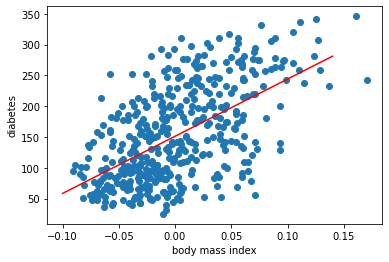

In [35]:
plt.scatter(X_diabetes[:,2],y_diabetes)

xs = np.arange(-.10,.15,.01)
plt.plot(xs, model.predict(np.expand_dims(xs,axis=1)),c='red')

plt.xlabel('body mass index')
plt.ylabel('diabetes')

We don't have to use only one feature in the linear regression model. We can use all of them.

In [36]:
model = lm.LinearRegression()
model.fit(Xtr_diabetes,ytr_diabetes)
yhat_linregr2 = model.predict(Xte_diabetes)

Let's check the predictions againt the ground truth:

In [37]:
print(yte_diabetes[0:10])
print(yhat_linregr1[0:10])
print(yhat_linregr2[0:10])

[ 52.  96.  95. 275.  71. 146. 174. 229. 206.  72.]
[189.38354536  90.27701318 144.33512165 220.41690393 129.31898041
 117.30606741 159.35126289 152.34373031 140.33081732 113.30176308]
[210.17699391  86.57527179 148.07989733 233.42081534 111.40304057
 138.09385015 175.67430121 190.84833912 169.31358364 110.5544537 ]


We will see how to evaluate properly later, but you already see that considering more features improved the results.

Unfortunately it is now unfeasible to plot the data considering all the features!

### Exercise

1. What do you think are the limitation of this model?
2. What do you think are the strength of this model?
3. Try to regress the diabetes index on age. What do you observe?

### Logistic Regression 
In logistic regression, we try to predict a category from (a set of) other values, again by combining them linearly.

Let us consider the *iris* data set. For illustration, we will try to classify data from two classes using sepal width and sepal length.

We first subselect the data we will work with.

In [38]:
selection_tr = ytr_iris<2
selection_te = yte_iris<2

Xtr_logregr = Xtr_iris[selection_tr,0:2]
ytr_logregr = ytr_iris[selection_tr]
Xte_logregr = Xte_iris[selection_te,0:2]
yte_logregr = yte_iris[selection_te]

Notice that our data has decreased

In [39]:
print(Xtr_logregr.shape)
print(Xte_logregr.shape)

(77, 2)
(23, 2)


We apply the model.

In [40]:
model = lm.LogisticRegression()

In [41]:
model.fit(Xtr_logregr,ytr_logregr)

LogisticRegression()

In [42]:
yhat_logregr = model.predict(Xte_logregr)

Now $\hat{y}$ are the prediction of our model. We can compare them with the ground truth ($y_{te}$)

In [43]:
print(yte_logregr[0:10])
print(yhat_logregr[0:10])

[0 0 1 0 1 1 0 0 1 0]
[0 0 1 0 1 1 0 0 1 0]


Let see exactly what our model is.

Text(0, 0.5, 'sepal width (cm)')

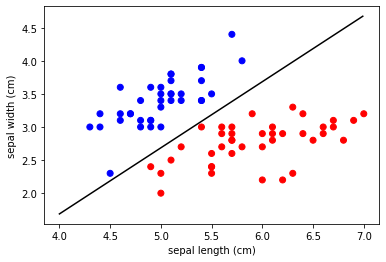

In [44]:
plt.scatter(Xtr_logregr[:,0],Xtr_logregr[:,1],c=ytr_logregr, cmap=matplotlib.colors.ListedColormap(colors))

xs = np.arange(4,7,.01)
line_bias = model.intercept_
line_w = model.coef_.T
ys=[(line_w[0]*x+line_bias)/(-1*line_w[1]) for x in xs]
plt.plot(xs, ys, c='black')

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

### Exercise

1. What is the difference between the line we plotted for linear regression and the line we plotted for logistic regression?
2. As in the case of linear regression, logistic regression is not limited to two features. Run the logistic regression algorithm using all four features.
3. Logistic regression can deal with more than two classes. Run the logistic regression algorithm using all four features, and considering three classes.

### k-means

Let us now suppose we were given the *iris* **without labels**.

With k-measn, we try to group together samples that are similar to each other.

For illustration, again we will work only with data from two classes, but this time we will use features petal width and petal length.

We first subselect the data we will work with.

In [45]:
selection_tr = ytr_iris<2
selection_te = yte_iris<2

Xtr_kmeans = Xtr_iris[selection_tr,2:4]
Xte_kmeans = Xte_iris[selection_te,2:4]

Notice we are not keeping labels anymore.

We apply the model.

In [46]:
import sklearn.cluster as ul

model = ul.KMeans(n_clusters=2)

Notice that models may have their own specific parameters. In this case, we need to specify in how many groups we want to cluster the data.

In [47]:
model.fit(Xtr_kmeans)

KMeans(n_clusters=2)

Since we had no labels, we can start looking how the training data were grouped.

In [48]:
yhat_kmeans = model.predict(Xtr_kmeans)

$\hat{y}$ constitute a sort of label that we learned with no supervision.

Let see exactly what our model is.

Text(0, 0.5, 'petal width (cm)')

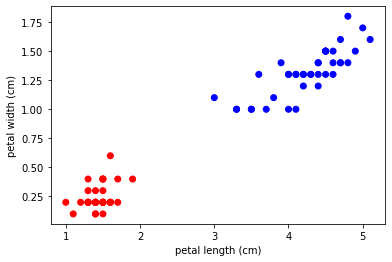

In [49]:
plt.scatter(Xtr_kmeans[:,0],Xtr_kmeans[:,1],c=yhat_kmeans, cmap=matplotlib.colors.ListedColormap(colors))

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

### Exercise

1. K-means group together points that are similar. How is this similarity defined?
2. Is the result we obtained satisfactory?
3. Re-run the k-means algorithm initializing it with 3 clusters. What do you observe in the results?
4. What if you run the algorithms initializing it with 4 or 5 clusters? What generic observations can you make on the number of clusters?
5. Change the selected features, and run the algorithm again. Are the result still satisfactory?

### Decision trees

Decision trees predict a category by observing the features and taking binary decisions.

We will illustrate decision trees on the whole *iris* dataset.

We apply the model.

In [50]:
import sklearn.tree as dt

model = dt.DecisionTreeClassifier()

In [51]:
model.fit(Xtr_iris,ytr_iris)

DecisionTreeClassifier()

In [52]:
yhat_dtree1 = model.predict(Xte_iris)

Now $\hat{y}$ are the prediction of our model. We can compare them with the ground truth ($y_{te}$)

In [53]:
print(yte_iris[0:10])
print(yhat_dtree1[0:10])

[2 2 0 2 0 1 0 1 1 0]
[2 2 0 2 0 1 0 1 1 0]


Let see exactly what our model is.

In [54]:
print(dt.export_text(model, feature_names=fnames_iris))

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal length (cm) <= 4.85
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |--- petal length (cm) >  4.85
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 5.35
|   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |--- sepal width (cm) <= 2.95
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- sepal width (cm) >  2.95
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  5.35
|   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- class: 2



This binary tree explains how decisions inside the tree are made.

Let us now apply the regression tree to the *diabetes* dataset, too.

In [55]:
model = dt.DecisionTreeRegressor()
model.fit(Xtr_diabetes,ytr_diabetes)
yhat_dtree2 = model.predict(Xte_diabetes)

In [56]:
print(dt.export_text(model, feature_names=fnames_diabetes))

|--- bmi <= 0.01
|   |--- s5 <= -0.00
|   |   |--- s2 <= 0.11
|   |   |   |--- s3 <= 0.02
|   |   |   |   |--- sex <= 0.00
|   |   |   |   |   |--- s1 <= -0.01
|   |   |   |   |   |   |--- bmi <= -0.01
|   |   |   |   |   |   |   |--- age <= -0.05
|   |   |   |   |   |   |   |   |--- bmi <= -0.04
|   |   |   |   |   |   |   |   |   |--- s6 <= -0.06
|   |   |   |   |   |   |   |   |   |   |--- bp <= -0.06
|   |   |   |   |   |   |   |   |   |   |   |--- value: [158.00]
|   |   |   |   |   |   |   |   |   |   |--- bp >  -0.06
|   |   |   |   |   |   |   |   |   |   |   |--- value: [142.00]
|   |   |   |   |   |   |   |   |   |--- s6 >  -0.06
|   |   |   |   |   |   |   |   |   |   |--- s2 <= -0.08
|   |   |   |   |   |   |   |   |   |   |   |--- value: [101.00]
|   |   |   |   |   |   |   |   |   |   |--- s2 >  -0.08
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |--- bmi >  -0.04
|   |   |   |   |   |   |   |   |   |--- s2 <=

### Exercise

1. Decision trees can be used for regression too, relying on the model *dt.DecisionTreeRegressor()*. Instantiate this regressor, apply it to *diabetes* data, and print the decision tree.
2. The decision tree model has a parameter *max_depth* to control the depth of the learned tree. Run again the decision tree model using different values for this parameter.

### Neural Networks 

Like decision trees, neural networks can be used both for classification and regression. A neural network is loosely inspired by the architecture of the human brain, and it processes data through a set of layers.

We will illustrate decision trees on the whole *iris* dataset.

First of all we need to use a little trick, and convert the label of the iris dataset into a **one-hot encoded** array.

We will transform the labels in this way:
- $0 \rightarrow [1, 0, 0]$
- $0 \rightarrow [0, 1, 0]$
- $0 \rightarrow [0, 0, 1]$

We use a *sklearn.preprocessing* function to do this. The code should now look to you very familiar.

In [57]:
onehot = preproc.OneHotEncoder(sparse=False)
onehot.fit(np.expand_dims(ytr_iris,axis=1))
ytr_iris_onehot = onehot.transform(np.expand_dims(ytr_iris,axis=1))
yte_iris_onehot = onehot.transform(np.expand_dims(yte_iris,axis=1))

Notice that the dimension of the label vector $y$ is now different.

In [58]:
ytr_iris_onehot.shape

(120, 3)

Let's check some labels.

In [59]:
ytr_iris_onehot[0:10,:]

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

Now we can apply the NN model.

In [60]:
import sklearn.neural_network as nn

model = nn.MLPClassifier()

In [61]:
model.fit(Xtr_iris,ytr_iris_onehot)

/home/fmzennaro/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [62]:
yhat_nn1 = model.predict(Xte_iris)

Now $\hat{y}$ are the prediction of our model. We can compare them with the ground truth ($y_{te}$)

In [63]:
print(yte_iris_onehot[0:10])
print(yhat_nn1[0:10])

[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]
[[0 0 1]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 0]
 [1 0 0]
 [0 0 0]
 [0 0 0]
 [1 0 0]]



Neural networks are very powerful models, but unfortunately they are hard to interpret. We can not really *plot* what they are doing. For this reason, NN are often called **black-box models**.

The power of NN stems from their flexibility. There are many **free parameters** you can set to customize your model. We will see some in the next example.


Let us now apply the regression NN to the *diabetes* dataset, too.

In [64]:
model = nn.MLPRegressor(hidden_layer_sizes=(20, 20),max_iter=10**5, activation='relu',learning_rate_init=0.001)
model.fit(Xtr_diabetes,ytr_diabetes)

MLPRegressor(hidden_layer_sizes=(20, 20), max_iter=100000)

Here we are setting up a NN made up by an input layer, two hidden layers of 20 neurons each, and an output layer. We use rectified linear unit for activation in the neurons. We train it for $10^5$ epochs, starting with a learning rate of $0.001$. 

In [65]:
yhat_nn2 = model.predict(Xte_diabetes)

Neural networks have many free parameters you can set:
- Number of hidden layers
- Number of hidden nodes per layer
- Number of learning iterations
- Learning rate
- Activation function of a neuron
- ...

Success in using NN requires experience in **tuning** this parameters.

There are more advanced packages (*tensorfow*, *pytorch*, *keras*) to design and use neural networks.

### Exercise

1. Can you guess why it is important to use a one-hot encoding of the labels?
2. Consider again the classification problem in the *iris*. Try to instantiate an architecture with three hidden layer of size 64, 32, 16, and then fit your model. 
3. Check the (doc)[https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier] and find out more about some of the parameters of a neural network classifier.

### Summary

- **Supervised Learning**:
    - *Regression*:
        - Linear Regression
        - Decistion Tree
        - Neural Network
    - *Classification*:
        - Logistic Regression
        - Decistion Tree
        - Neural Network
        
- **Unsupervised Learning**:
    - *Clustering*:
        - k-means

## Evaluation

So far, we have looked at the results of our models in a *visual/intuitive* way.

Now we will consider *numerical* measures of **generalization**.

As we want to evaluate generalization, we will now always work with the **test data**.

## Evaluating classification

A simple measure to compute classification is to count (in percentage) the number of correct guesses and wrong guesses.

As always *sklearn* provides the tool we need, in *sklearn.metrics* (see [doc](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics))


In [66]:
import sklearn.metrics as metrics

Let us now compute the classification accuracy of logistic regression, decision tree, and neural network.

In [67]:
metrics.accuracy_score(yte_logregr,yhat_logregr)

1.0

In [68]:
metrics.accuracy_score(yte_iris,yhat_dtree1)

0.9666666666666667

In [69]:
metrics.accuracy_score(yte_iris_onehot,yhat_nn1)

0.6666666666666666

### Exercise

1. How do you interpret these results? Are the three values comparable?
2. Do you see any problem in evaluating your model only in terms of accuracy? Think, for instance, of deploying your model in a medical setting for diagnosing potentially deadly diseases.
3. Can you imagine other possible measures of generalization for your models?
4. Can you instantiate neural networks with a different architecture and better accuracy?

## Evaluating regression

For regression we can not count anymore (because we have continuous outputs instead of discrete), but we can measure how far our predictions are from the truth.

Let us compute the classification accuracy of linear regression, decision tree, and neural network.

In [70]:
metrics.mean_squared_error(yte_linregr,yhat_linregr1)

3472.4481164111635

In [71]:
metrics.mean_squared_error(yte_diabetes,yhat_linregr2)

2298.358456182747

In [72]:
metrics.mean_squared_error(yte_diabetes,yhat_dtree2)

6105.836956521739

In [73]:
metrics.mean_squared_error(yte_diabetes,yhat_nn2)

2308.473501757075

### Exercise

1. What can you infer from the comparison of the two results of linear regression? 
2. What can you infer by comparing the model that were trained and tested on the same *iris* data.
3. Can you imagine other possible measures of generalization for your models?
4. Can you instantiate neural networks with a different architecture and better MSE?

# Learning More

This class has illustrated how machine learning can be carried out using python.

*python* provides a **powerful** and **fun** environment to do machine learning!

*sklearn* can assist you in all the steps of learning.


Some **takeaway points** when you do machine learning in python:

- Think about what you are doing
- Think about what you want to do
- Think about what model you can use
- Read the documentation


There is **much much more** to machine learning and python!!

If you want to learn more about python, check:
- [https://www.python.org/](https://www.python.org/)

If you want to learn more about scikit-learn, check:
- [https://scikit-learn.org/stable/index.html](https://scikit-learn.org/stable/index.html)

If you want to learn more about machine learning in python, consider:
- Sarah Guido, *Introduction to Machine Learning with Python*
- [Introduction to Machine Learning with Python](https://github.com/amueller/introduction_to_ml_with_python)
- [Dive into Machine Learning](https://github.com/hangtwenty/dive-into-machine-learning)
- Sebastian Raschka, *Python Machine Learning*

If you want to learn more about machine learning, consider:
- Cristoper Bishop, *Pattern Recognition and Machine Learning*
- Peter E. Hart, Richard O. Duda, David G. Stork, *Pattern Classification*